## Universal 함수

1. [3, 6, 0.7, np.NaN, np.inf] 배열을 생성한 뒤,

각 원소가 NaN인지 아닌지 불리안 배열을 반환하자

각 원소가 inf인지 아닌지 불리안 배열을 반환하자

원래 배열의 NaN이나 inf인 원소가 있다면 0으로 바꾸자

In [2]:
import numpy as np
a = np.array([3, 6, 0.7, np.NaN, np.inf])

In [3]:
np.isnan(a)
np.isinf(a)
a[np.isinf(a) | np.isnan(a)] = 0

In [4]:
a

array([3. , 6. , 0.7, 0. , 0. ])

2. [np.pi, np.pi/2, np.pi/3] 배열을 생성한 뒤

각 원소의 cos, sin 값을 새로운 배열 C,S 로 생성하여 반환하자

out옵션을 써서, cos값과 sin 값 중에 더 큰 값으로 기존 배열 A에 할당하고
반환하자

In [5]:
b = np.array([np.pi, np.pi/2, np.pi/3])

In [6]:
c = np.cos(b)
c

array([-1.000000e+00,  6.123234e-17,  5.000000e-01])

In [7]:
s = np.sin(b)
s

array([1.22464680e-16, 1.00000000e+00, 8.66025404e-01])

In [8]:
np.maximum(c, s, out=b)

array([1.22464680e-16, 1.00000000e+00, 8.66025404e-01])

np.where 함수 많이 사용됨
- 조건부 표현 가능
- 다른 배열에 기반해 새로운 배열 생성하기 위해 주로 사용

In [9]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [11]:
# cond가 True면 x, False이면 y
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [14]:
rng = np.random.default_rng(seed=12345)
arr = rng.standard_normal((4, 4))
c = arr > 0
c

array([[False,  True, False, False],
       [False, False, False,  True],
       [ True, False,  True,  True],
       [False,  True, False, False]])

In [15]:
# True이면 두번째 인수, False이면 세번째 인수
np.where(c, 2, -2)

array([[-2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [-2,  2, -2, -2]])

In [16]:
np.where(c, 2, arr)

array([[-1.42382504,  2.        , -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  2.        ],
       [ 2.        , -1.95286306,  2.        ,  2.        ],
       [-0.75938718,  2.        , -0.46695317, -0.06068952]])

## 수학 메소드/통계 메소드

In [18]:
arr = rng.standard_normal((5, 4))
arr

array([[ 0.7519394 , -0.65876032, -1.22867499,  0.25755777],
       [ 0.31290292, -0.13081169,  1.26998312, -0.09296246],
       [-0.06615089, -1.10821447,  0.13595685,  1.34707776],
       [ 0.06114402,  0.0709146 ,  0.43365454,  0.27748366],
       [ 0.53025239,  0.53672097,  0.61835001, -0.79501746]])

In [19]:
np.mean(arr)

0.12616728705271302

### 축 지정 가능

In [21]:
arr.mean(axis=1)    # 1번 축을 따라 평균 계산

array([-0.21948454,  0.33977797,  0.07716731,  0.2107992 ,  0.22257648])

In [22]:
arr.mean(axis=0)    # 0번 축을 따라 평균 계산

array([ 0.31801757, -0.25803018,  0.24585391,  0.19882786])

In [23]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()    # arr 원소의 누적합 계산

array([ 0,  1,  3,  6, 10, 15, 21, 28])

[3,6,0.7,np.NaN,np.inf] 배열을 생성한 뒤,

NaN이나 inf인 원소가 있다면 해당 원소들을 나머지 원소들의 평균으로 바꾸자

In [24]:
a = np.array([3, 6, 0.7, np.NaN, np.inf])

In [26]:
# np.where 없이 해결, NaN, inf인 원소를 not(~)을 이용하여 나머지 원소들의 평균을 구해 값 변경
a[np.isnan(a) | np.isinf(a)] = np.mean(a[~(np.isnan(a) | np.isinf(a))])

array([3.        , 6.        , 0.7       , 3.23333333, 3.23333333])

In [28]:
# np.where 이용하여 해결, NaN이나 inf이면 나머지 원소들의 평균을 구해 대입, 아니면 a 원소 그대로 놔둠
a = np.where(np.isnan(a) | np.isinf(a), np.mean(a[~(np.isnan(a) | np.isinf(a))]), a)
a

array([3.        , 6.        , 0.7       , 3.23333333, 3.23333333])

## 불리언 배열 메서드

In [29]:
arr = rng.standard_normal(100)
arr > 0

array([ True, False,  True, False, False,  True, False,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True])

In [32]:
(arr > 0).sum()

50

In [34]:
(arr <= 0).sum()

50

## 정렬

In [35]:
arr = rng.standard_normal(6)
arr

array([-0.86924667, -0.52900707,  0.0456841 , -1.02755181, -1.2292893 ,
       -0.88335847])

In [38]:
arr.sort()

In [39]:
arr

array([-1.2292893 , -1.02755181, -0.88335847, -0.86924667, -0.52900707,
        0.0456841 ])

In [40]:
arr = rng.standard_normal((5,3))
arr

array([[-0.07089346,  0.37405335, -0.02459374],
       [ 0.07726066, -0.68391322, -0.72083767],
       [ 1.12062282, -0.05481416, -0.08241372],
       [ 0.9359865 ,  1.23853712,  1.27279553],
       [ 0.40589222, -0.05032522,  0.28931754]])

In [41]:
arr.sort(axis=0)
arr

array([[-0.07089346, -0.68391322, -0.72083767],
       [ 0.07726066, -0.05481416, -0.08241372],
       [ 0.40589222, -0.05032522, -0.02459374],
       [ 0.9359865 ,  0.37405335,  0.28931754],
       [ 1.12062282,  1.23853712,  1.27279553]])

In [42]:
arr.sort(axis=1)
arr

array([[-0.72083767, -0.68391322, -0.07089346],
       [-0.08241372, -0.05481416,  0.07726066],
       [-0.05032522, -0.02459374,  0.40589222],
       [ 0.28931754,  0.37405335,  0.9359865 ],
       [ 1.12062282,  1.23853712,  1.27279553]])

## Random Walk
매 반복 동안 0.5의 같은 확률로 +1, -1을 결정

0부터 시작해서 여러 번 +1 혹은 -1의 값을 추가

반복이 증가함에 따라 값이 어떻게 변화하는 지 나열

### 리스트/for문 통한 구현

In [43]:
import random
import time

t_start=time.time()
position = 0
walk = [position]
nsteps = 1000000
for _ in range(nsteps):
    if random.randint(0, 1): 
        step = 1 
    else:
        step=-1
    position += step
    walk.append(position)
t_end=time.time()
t_end-t_start

0.5071752071380615

In [46]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

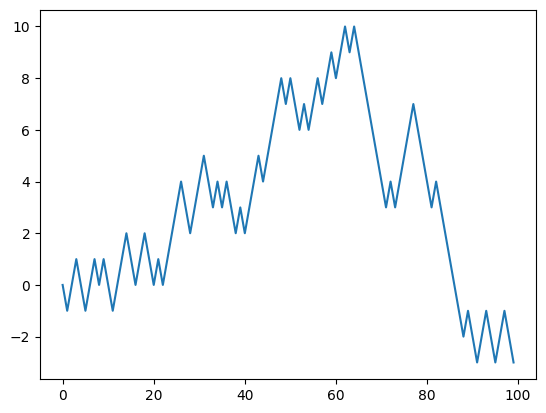

In [47]:
plt.plot(walk[:100])

### 넘파이를 이용한 구현

In [52]:
t_start = time.time()
nsteps = 1000000
rng = np.random.default_rng(seed=12345)

draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()
t_end = time.time()
t_end - t_start

0.014000415802001953